# deteccion mineral mica en rocas de granito prototipo

In [1]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt
print(cv2.__version__)
import os
import pandas as pd

%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

print ('Versión de OpenCV: ' + cv2.__version__)

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq
import os
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = (16,8) #Aumentar el tamaño del canvas en Jupyter

4.5.5
Versión de OpenCV: 4.5.5


##  Calcularemos el porcentaje de mica en rocas de granito en una fotografia de roca granito

### El algoritmo k-means

K-means es un algoritmo de clasificación no supervisada (clusterización) que agrupa objetos en k grupos basándose en sus características. El agrupamiento se realiza minimizando la suma de distancias entre cada objeto y el centroide de su grupo o cluster. Se suele usar la distancia cuadrática.

El algoritmo consta de tres pasos:

Inicialización: una vez escogido el número de grupos, k, se establecen k centroides en el espacio de los datos, por ejemplo, escogiéndolos aleatoriamente. Asignación objetos a los centroides: cada objeto de los datos es asignado a su centroide más cercano. Actualización centroides: se actualiza la posición del centroide de cada grupo tomando como nuevo centroide la posición del promedio de los objetos pertenecientes a dicho grupo.

Se repiten los pasos 2 y 3 hasta que los centroides no se mueven, o se mueven por debajo de una distancia umbral en cada pas

En resumen, K-means es un algoritmo de agrupamiento. Su objetivo es particionar n puntos de datos en k clusters.

Cada uno de los n puntos de datos se asignará a un grupo con la media más cercana. A la media de cada grupo se le llama "centroide" o "centro". En general, la aplicación de k-means produce k grupos separados de los n puntos de datos originales. Los puntos de datos dentro de un grupo particular se consideran "más similares" entre sí que los puntos de datos que pertenecen a otros grupos.


## Libreria analisis de computer vision

### Open cv

### Lectura y transformacion de datos

#### caso de prototipo, una sola imagen

Total de pixeles =  766976
Total de colores =  29391


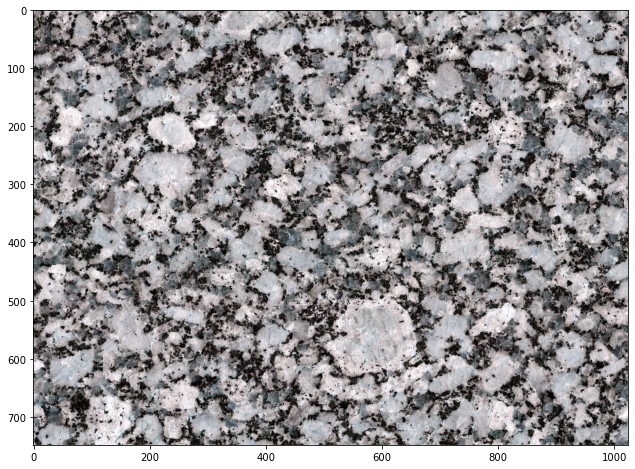

In [2]:
imagen = 'granite.jpg'

def visualizar_imagen(imagen):
    global I
    img = cv2.imread(imagen)
    I = Image.open(imagen)
    w, h = I.size
    colors = I.getcolors(w * h)
    num_colors = len(colors) 
    num_pixels = w*h 
    print ('Total de pixeles = ', num_pixels)
    print ('Total de colores = ', num_colors)
    plt.imshow(img)

visualizar_imagen(imagen)

### Transformacion de los datos

In [4]:
# Dimension del tensor RGB
matriz_img = np.asarray(I,dtype=np.float32)/255
x,y,z = matriz_img.shape 
print(matriz_img.shape)

data = matriz_img.reshape(x*y,3)



def kmedias_fun(df,n):
    global k_means,centroids,labels
    
    k_means = KMeans(n_clusters=n)
    k_means.fit(df)
    centroids = k_means.cluster_centers_
    labels = k_means.labels_
    score_kmedia = k_means.score(df)
    
    return k_means,centroids,labels,score_kmedia

k_means = kmedias_fun(data,5)
k_means

(749, 1024, 3)


(KMeans(n_clusters=5),
 array([[0.5135634 , 0.5074319 , 0.5162943 ],
        [0.68918663, 0.6783209 , 0.6921047 ],
        [0.08630535, 0.09131134, 0.09783468],
        [0.31721163, 0.31485784, 0.31611294],
        [0.8346046 , 0.82077146, 0.83706164]], dtype=float32),
 array([0, 1, 1, ..., 1, 0, 1]),
 -6957.80908203125)

### Metrica de accuracy modelo, indicador coeficiente de silueta

#### Mientras mas se acerca a 1 el score mejor es el ajuste del modelo

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(data, labels, metric="euclidean")
print(
        "For n_clusters =",
        5,
        "The average silhouette_score is :",
        silhouette_avg,
    )


In [6]:
mat_new_images = centroids[labels]
print('mat_new_images shape ', mat_new_images.shape)

mat_new_images shape  (766976, 3)


In [7]:
mat_percent_mica = mat_new_images.reshape(x,y,z)
print(' shape ', mat_percent_mica.shape)

 shape  (749, 1024, 3)


In [8]:
mat_norm = (mat_new_images -  np.min(mat_new_images))/(np.max(mat_new_images)-np.min(mat_new_images))*255
mat_mica = mat_norm.astype(np.uint8)
I2 = Image.fromarray(mat_mica)

w, h =I2.size
colores = I2.getcolors(w * h)
print(colores)

[(115183, 0), (115183, 1), (115183, 3), (113217, 77), (226434, 78), (143815, 143), (143815, 145), (143815, 146), (214546, 201), (214546, 204), (214546, 205), (180215, 249), (180215, 254), (180215, 255)]


In [9]:
print('porcentaje de mineral mica en roca granito ',100*float(colores[0][0])/float(w*h), '%')

porcentaje de mineral mica en roca granito  5.0059367350912325 %


In [10]:
import joblib  

In [11]:
joblib.dump(kmeans, 'modelo_entrenado.pkl') # Guardo el modelo.

['modelo_entrenado.pkl']